# 1월 20일

#Q.기계학습과 딥러닝의 차이점은?
#Q.경사하강법 그림으로 표현하면?
#Q.가중치는 신경망의 어디에 해당하는가?
#Q.어떻게 다층으로 복잡한 문제를 풀 수 있는가?
#Q.다층네트웍을 학습시키기가 어려운 이유는?

#Q.y=wx+b에서 b는 왜 필요한가? w=신경전달물질 b=y절편/bias
 원점을 지나야 한다는 것이 제약조건-> b를 두어 가변성

#Q.활성화는 비선형이어야하는가?

#Q.sigmoid 함수의 장점은?

#Q.딥러닝의 핵심돌파구는? 층이 많아지면(?) 학습이 안되는 경향이 있다(학습 되는 층과 안되는 층이 있다). (학습이 안되는 층은 랜덤) /뒤로 갈수록 학습이 잘 됨.

#Q.왜 CNN을 특징추출과 분류기결합으로 보는가?

평균 제곱근 오차 RMSE(Root Mean Square Error)


In [18]:
#역행렬을 이용한 최적해 구하기
import numpy as np #넘파이 사용 이유: 고속으로 연산가능/단일데이터타입
import numpy.linalg as lin

a=np.array([[1,1],[2,1]])
print(a)
print(a.shape)

a_=lin.inv(a) #inverse
print(a_)

[[1 1]
 [2 1]]
(2, 2)
[[-1.  1.]
 [ 2. -1.]]


In [23]:
y=np.array([2,4]) #print(y.shape)=(2,) 즉, y는 1차원 벡터
y_1=np.array([[2,4]]) #print(y_1.shape)=(1x2)행렬 ex.[2,4]
y_2=np.array([[2],[4]]) #print(y_2.shape)=(2x1)행렬(컬럼벡터/밑으로 내려가는 형태)
y=np.array([2,4]).reshape(2,1) #(2x1)컬럼벡터로 바꿔줌
print(y)

w=np.matmul(a_,y) #[2x2]x[2x1]=[2x1]행렬
print(w)
#행렬곱(두개의 행렬이 같을 경우) vs 산술곱

[[2]
 [4]]
[[2.]
 [0.]]


In [35]:
a=np.array([[1,1],[2,1],[3,1]]) #3x2행렬
a_=lin.pinv(a) #정방행렬이 아닐경우에는 p붙여줌
print(a_) #2x3행렬
y=np.array([2,4,6.4]).reshape(3,1) 
w=np.matmul(a_,y) 
print(w) #2x1행렬

[[-5.00000000e-01 -3.19189120e-16  5.00000000e-01]
 [ 1.33333333e+00  3.33333333e-01 -6.66666667e-01]]
[[ 2.2       ]
 [-0.26666667]]


In [42]:
# x=1일 때 y값, 오차범위
print(w[0][0])
y=w[0,0]*1+w[1,0] # y=wx+b
print(y)
x=np.array([[-1,1],[0,1],[1,1],[2,1]])
np.matmul(x,w)

2.2000000000000006
1.9333333333333322


In [47]:
#2
# a=np.array([[2,2,0],[-2,1,1]])
# lin.inv(a)

a=np.array([[1,2],[2,4],[3,6.4]])
print(np.linalg.pinv(a))

[[ 3.2  6.4 -5. ]
 [-1.5 -3.   2.5]]


In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping # earlystopping:학습이 어느정도 되면 멈춰라
from keras.layers import LeakyReLU

def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
#epoch 나머지 = 첫번째일때는 무조건 출력하고, step일때 log정보출력        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

#pip install --user tensorflow
#$ python -m pip install --user --upgrade pip

In [45]:
#https://sacko.tistory.com/42?category=632408
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])

model=Sequential()

model.add(Dense(10, input_dim=2)) #hidden layers=10개
model.add(Activation('sigmoid')) #Param=30(hidden layers*3)

model.add(Dense(5)) #input_dim=이전층의 output을 input으로 둠
model.add(Activation('sigmoid')) 

model.add(Dense(5))
model.add(Activation('sigmoid')) 

model.add(Dense(1)) #점점 학습이 더 잘 됨.
model.add(Activation('sigmoid')) #Param=11(이전층의 히든레이어 10개 +1)

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 55        
_________________________________________________________________
activation_26 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 30        
_________________________________________________________________
activation_27 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)               

In [46]:
model.compile(loss='binary_crossentropy',optimizer='adam')
#손실함수/최적화방법(adam이 가장 보편적으로 사용)
model.fit(X,y,batch_size=4,epochs=3000,verbose=0) 
#전체데이터 4개, batch size=경사하강법의 크기 
print(model.predict_proba(X)) #4x1행렬/ sample 수 x 클래스수이미르

p=model.predict(X)
print(p>0.5)

[[0.01020828]
 [0.991074  ]
 [0.99356836]
 [0.010255  ]]
[[False]
 [ True]
 [ True]
 [False]]


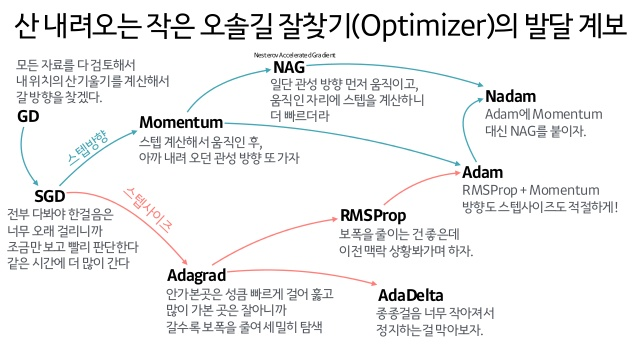

In [34]:
from IPython.display import Image
 
Image("optimizer.jpg") # code안에서 나오게 할 때
# ![title](img/picture.png) # markdown안에서 나오게 할 때

(100, 2)
<class 'numpy.ndarray'>
(100, 1)


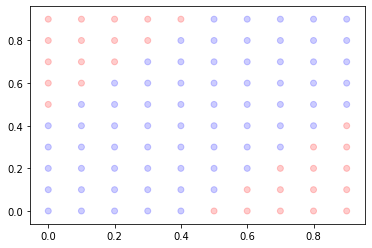

In [50]:
#그래프 그리기
xx, yy = np.mgrid[0:1:0.1, 0:1:0.1] 
#mgrid: x,y가 0에서 1까지 변할때 0.1씩 변하는 값을 2차원 배열로 만듬 
grid = np.c_[xx.flatten(), yy.flatten()] #flatten: 2차원을 1차원으로 편다.
# print(grid)
print(grid.shape) #(100x2)행렬
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red" if i>0.5  else "blue"  for i  in h]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

(500,)


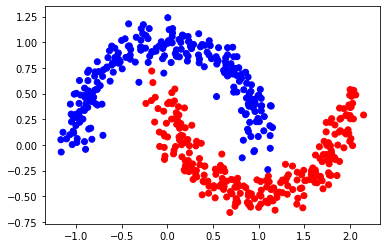

In [10]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.1)  #학습데이터 500개
#x는 2차원, y는 레이블 0  1 #print(x_data.shape)=(500,2) print(y_data.shape)=(500,)
colors = ["red" if i==1  else "blue" for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

0 => {'val_loss': 0.7065949082374573, 'val_accuracy': 0.5, 'loss': 0.7078775048255921, 'accuracy': 0.5}
500 => {'val_loss': 0.27558634877204896, 'val_accuracy': 0.8999999761581421, 'loss': 0.27568436563014986, 'accuracy': 0.9}
1000 => {'val_loss': 0.050195444747805594, 'val_accuracy': 0.9919999837875366, 'loss': 0.05041510462760925, 'accuracy': 0.992}
1500 => {'val_loss': 0.014589570090174675, 'val_accuracy': 0.9959999918937683, 'loss': 0.014757862221449614, 'accuracy': 0.996}
2000 => {'val_loss': 0.009537073969841003, 'val_accuracy': 0.9959999918937683, 'loss': 0.009744878811761736, 'accuracy': 0.996}
2500 => {'val_loss': 0.0077907195780426266, 'val_accuracy': 0.9980000257492065, 'loss': 0.008073499286547303, 'accuracy': 0.996}


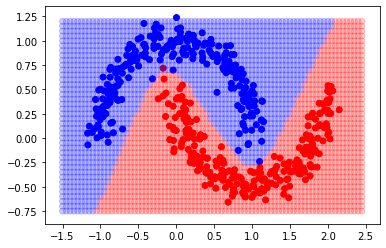

In [29]:
model=Sequential([
    Dense(5, activation='sigmoid',input_dim=2),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit(x_data,y_data,batch_size=100,epochs=3000,verbose=0, #verbose=1->epoch할때마다 결과출력 
          validation_data=(x_data,y_data), callbacks=[printepoch(500)]) #500번마다 한번씩 출력
colors = ["red" if i==1  else "blue" for i in y_data]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  

xx, yy = np.mgrid[-1.5:2.5:0.05, -0.75:1.25:0.05] 
grid = np.c_[xx.ravel(), yy.ravel()] 
h = model.predict_proba(grid)
colors = ["red" if i>0.5  else "blue"  for i  in h]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

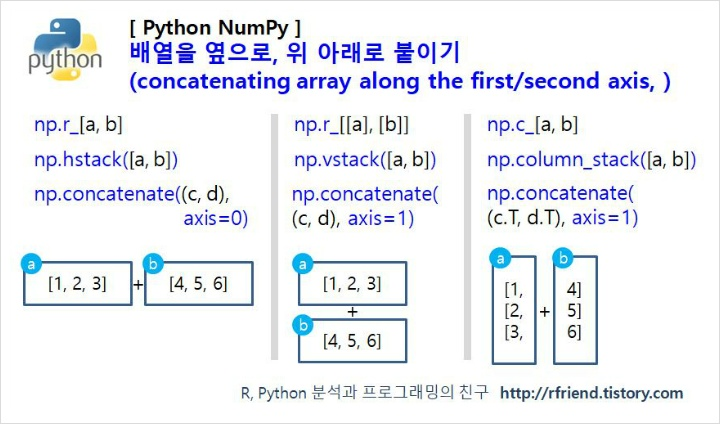

In [20]:
from IPython.display import Image
Image("np.c_.jpg") 

0 => {'val_loss': 0.7027112364768981, 'val_accuracy': 0.4880000054836273, 'loss': 0.7080981373786926, 'accuracy': 0.328}
100 => {'val_loss': 0.14041887819767, 'val_accuracy': 0.9539999961853027, 'loss': 0.1424553230404854, 'accuracy': 0.952}
200 => {'val_loss': 0.021979399770498276, 'val_accuracy': 0.9980000257492065, 'loss': 0.02230459451675415, 'accuracy': 0.998}
300 => {'val_loss': 0.009042486734688281, 'val_accuracy': 0.9980000257492065, 'loss': 0.009316060785204172, 'accuracy': 0.998}
400 => {'val_loss': 0.005208255699835717, 'val_accuracy': 0.9980000257492065, 'loss': 0.005298857344314456, 'accuracy': 0.998}


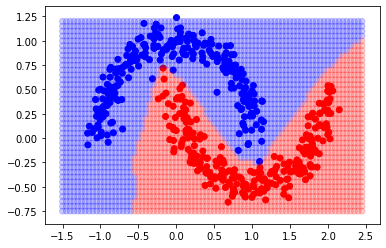

In [39]:
model=Sequential([Dense(5, activation=LeakyReLU(alpha=0.1),input_dim=2),
                  Dense(10, activation=LeakyReLU(alpha=0.1)),
                  Dense(10, activation=LeakyReLU(alpha=0.1)),
                  Dense(10, activation=LeakyReLU(alpha=0.1)),
                  Dense(1, activation='sigmoid')])
#activation(활성화함수)중요!
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit(x_data,y_data,batch_size=100,epochs=500,verbose=0,
          validation_data=(x_data,y_data), callbacks=[printepoch(100)])

colors = ["red" if i==1  else "blue" for i in y_data]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  

xx, yy = np.mgrid[-1.5:2.5:0.05, -0.75:1.25:0.05] 
grid = np.c_[xx.ravel(), yy.ravel()] 
h = model.predict_proba(grid)
colors = ["red" if i>0.5  else "blue"  for i  in h]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

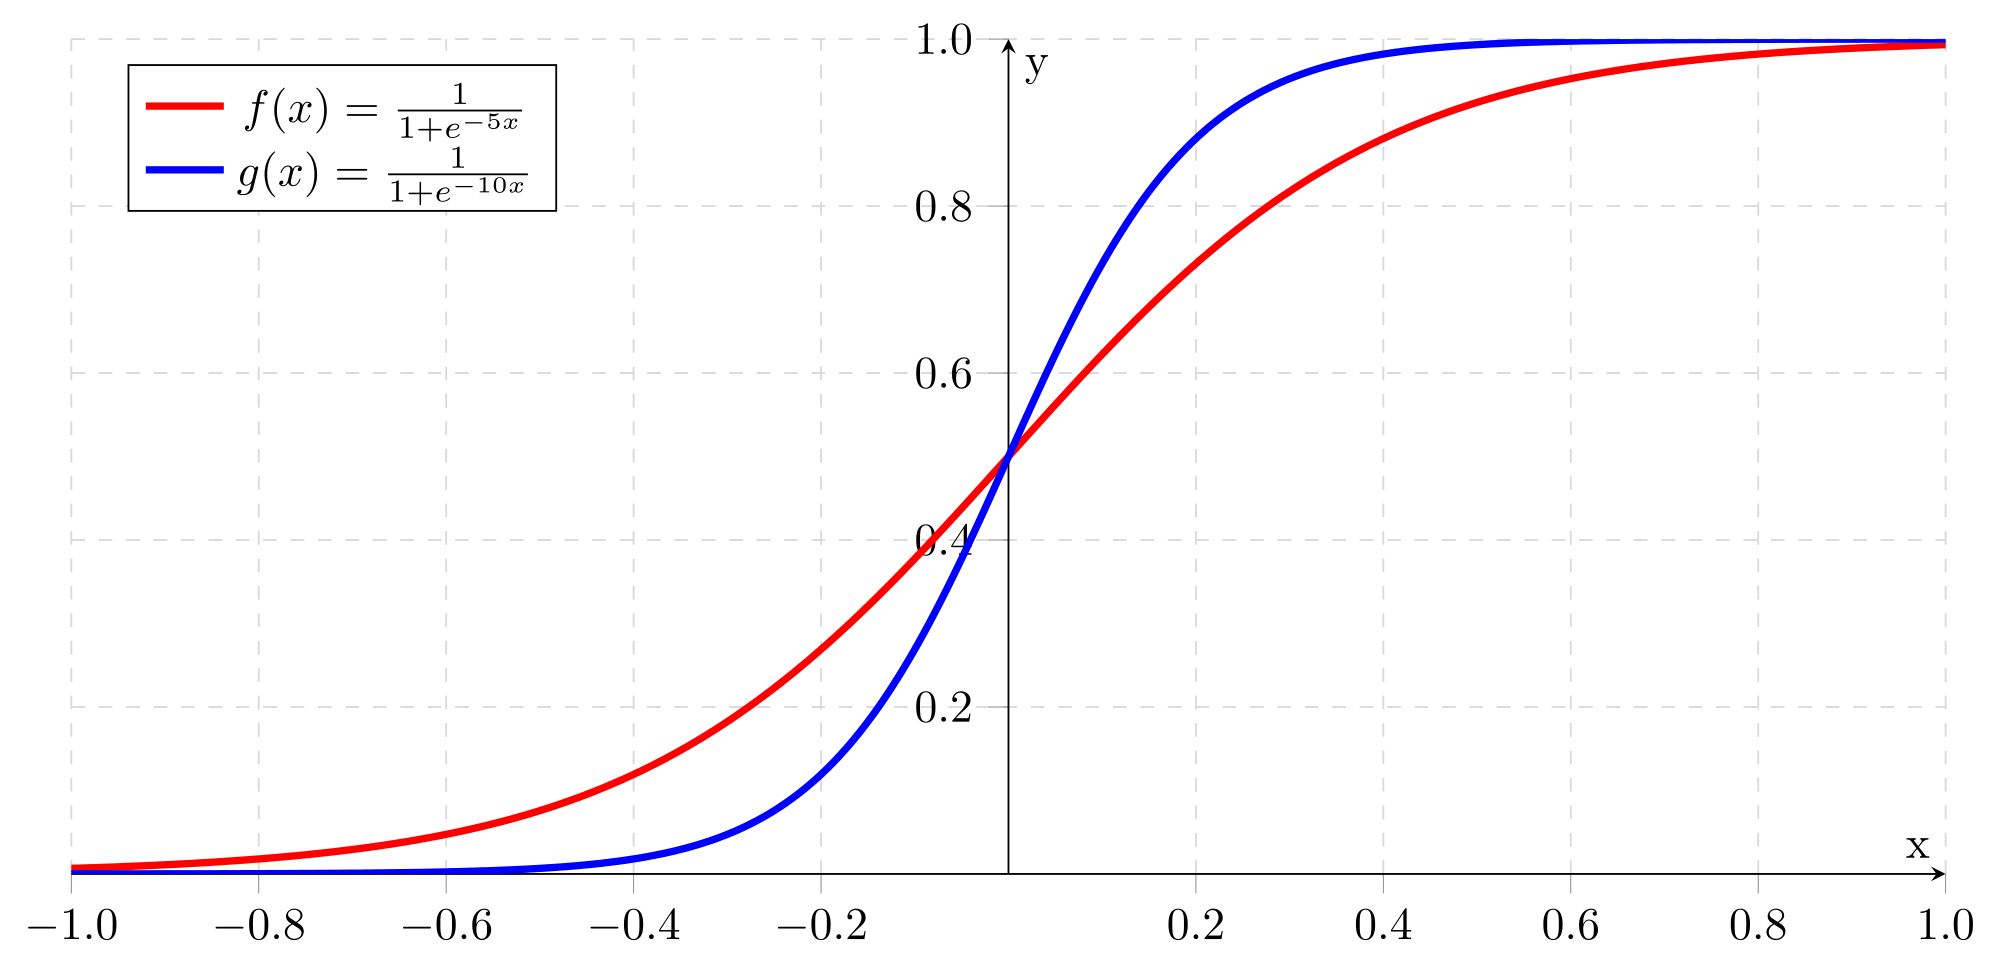

In [32]:
from IPython.display import Image
Image("sigmoid.png")   #수렴하는구조/역치
#-0.5~0.5사이에서 미분가능, 나머지 미분 0

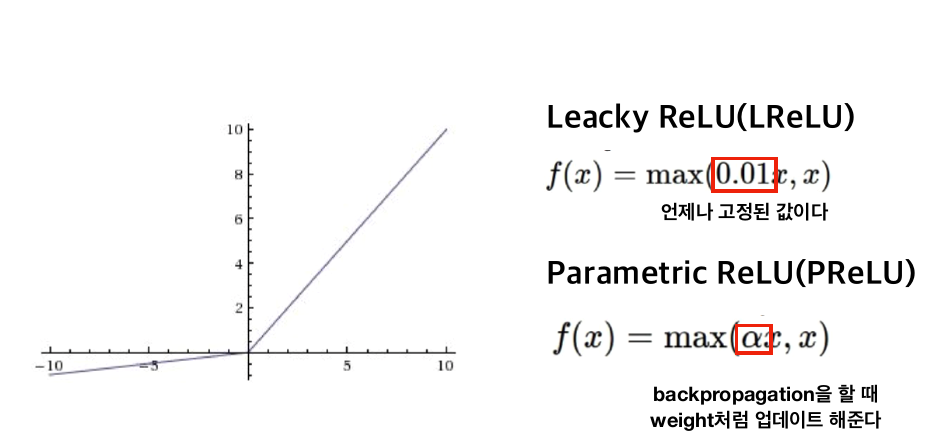

In [35]:
from IPython.display import Image
Image("ReLU.png")  #속도가 빠르고, 학습이 안되는 경우가 상대적으로 적다.
#발산하는 구조

학습률 α가 작은 경우: 조금씩 이동하면서 최저지점을 찾아감/이동횟수가 많아져 학습 속도가 느림

In [40]:
def createModel(layers, activation, input_dim):
    model=Sequential()
    d=layers.pop(0)
    model.add(Dense(d,activation=activation, input_dim=input_dim))
    for l in layers:
        model.add(Dense(l,activation=activation))
    model.add(Dense(1,activation='sigmoid'))
    return model

model=createModel([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5],
                   LeakyReLU(alpha=0.1),2)
